In [1]:
using BlochSpins
using StaticArrays
using CairoMakie
CairoMakie.activate!()
fig, ax = init_figure()
function init_figure()
    fig = Figure(size = (800, 800))
    ax = LScene(fig[1, 1], show_axis = false)
    return fig, ax
end
function visualize_bloch_sphere!(fig, ax)
    # draw sphere
    mesh!(ax, Sphere(Point3f(0), 1f0), color = (:skyblue, 0.15), transparency = true)
    # draw wireframe
    wireframe!(ax, Sphere(Point3f(0), 1f0), color = (:black, 0.1), linewidth = 0.5)
end
function visualize_axis!(fig, ax)
    # (X, Y, Z) axes
    lines!(ax, [-1, 1], [0, 0], [0, 0], color = :red)
    lines!(ax, [0, 0], [-1, 1], [0, 0], color = :green)
    lines!(ax, [0, 0], [0, 0], [-1, 1], color = :blue)
    # axis labels
    text!(ax, "X", position = Point3f(1.1, 0, 0), color = :red)
    text!(ax, "Y", position = Point3f(0, 1.1, 0), color = :green)
    text!(ax, "Z", position = Point3f(0, 0, 1.1), color = :blue)
end
function visualize_vector(vec)
    b_vec = real.(vec)
    arrows3d!(ax, [Point3f(0)], [Point3f(b_vec...)], 
        tipradius = 0.05, 
        tiplength = 0.1, 
        shaftradius = 0.01, 
        
        diffuse = 0.8, 
        color = :black,
        transparency = true
    )
end

fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
visualize_vector(bloch_vector(k_plus))
display(fig)


LoadError: UndefVarError: `bloch_vector` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
function bloch_vector(k::Ket)
    x = expect(σx, k)
    y = expect(σy, k)
    z = expect(σz, k)
    return SVector(x, y, z)
end

up = SVector(1.0, 0.0)
dn = SVector(0.0, 1.0)

bloch_vector(Ket(up))  # should be SVector(0.0, 0.0, 1.0)
# bloch_vector(Ket(dn))  # should be SVector(0.0, 0.0, -1.0)


3-element SVector{3, ComplexF64} with indices SOneTo(3):
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

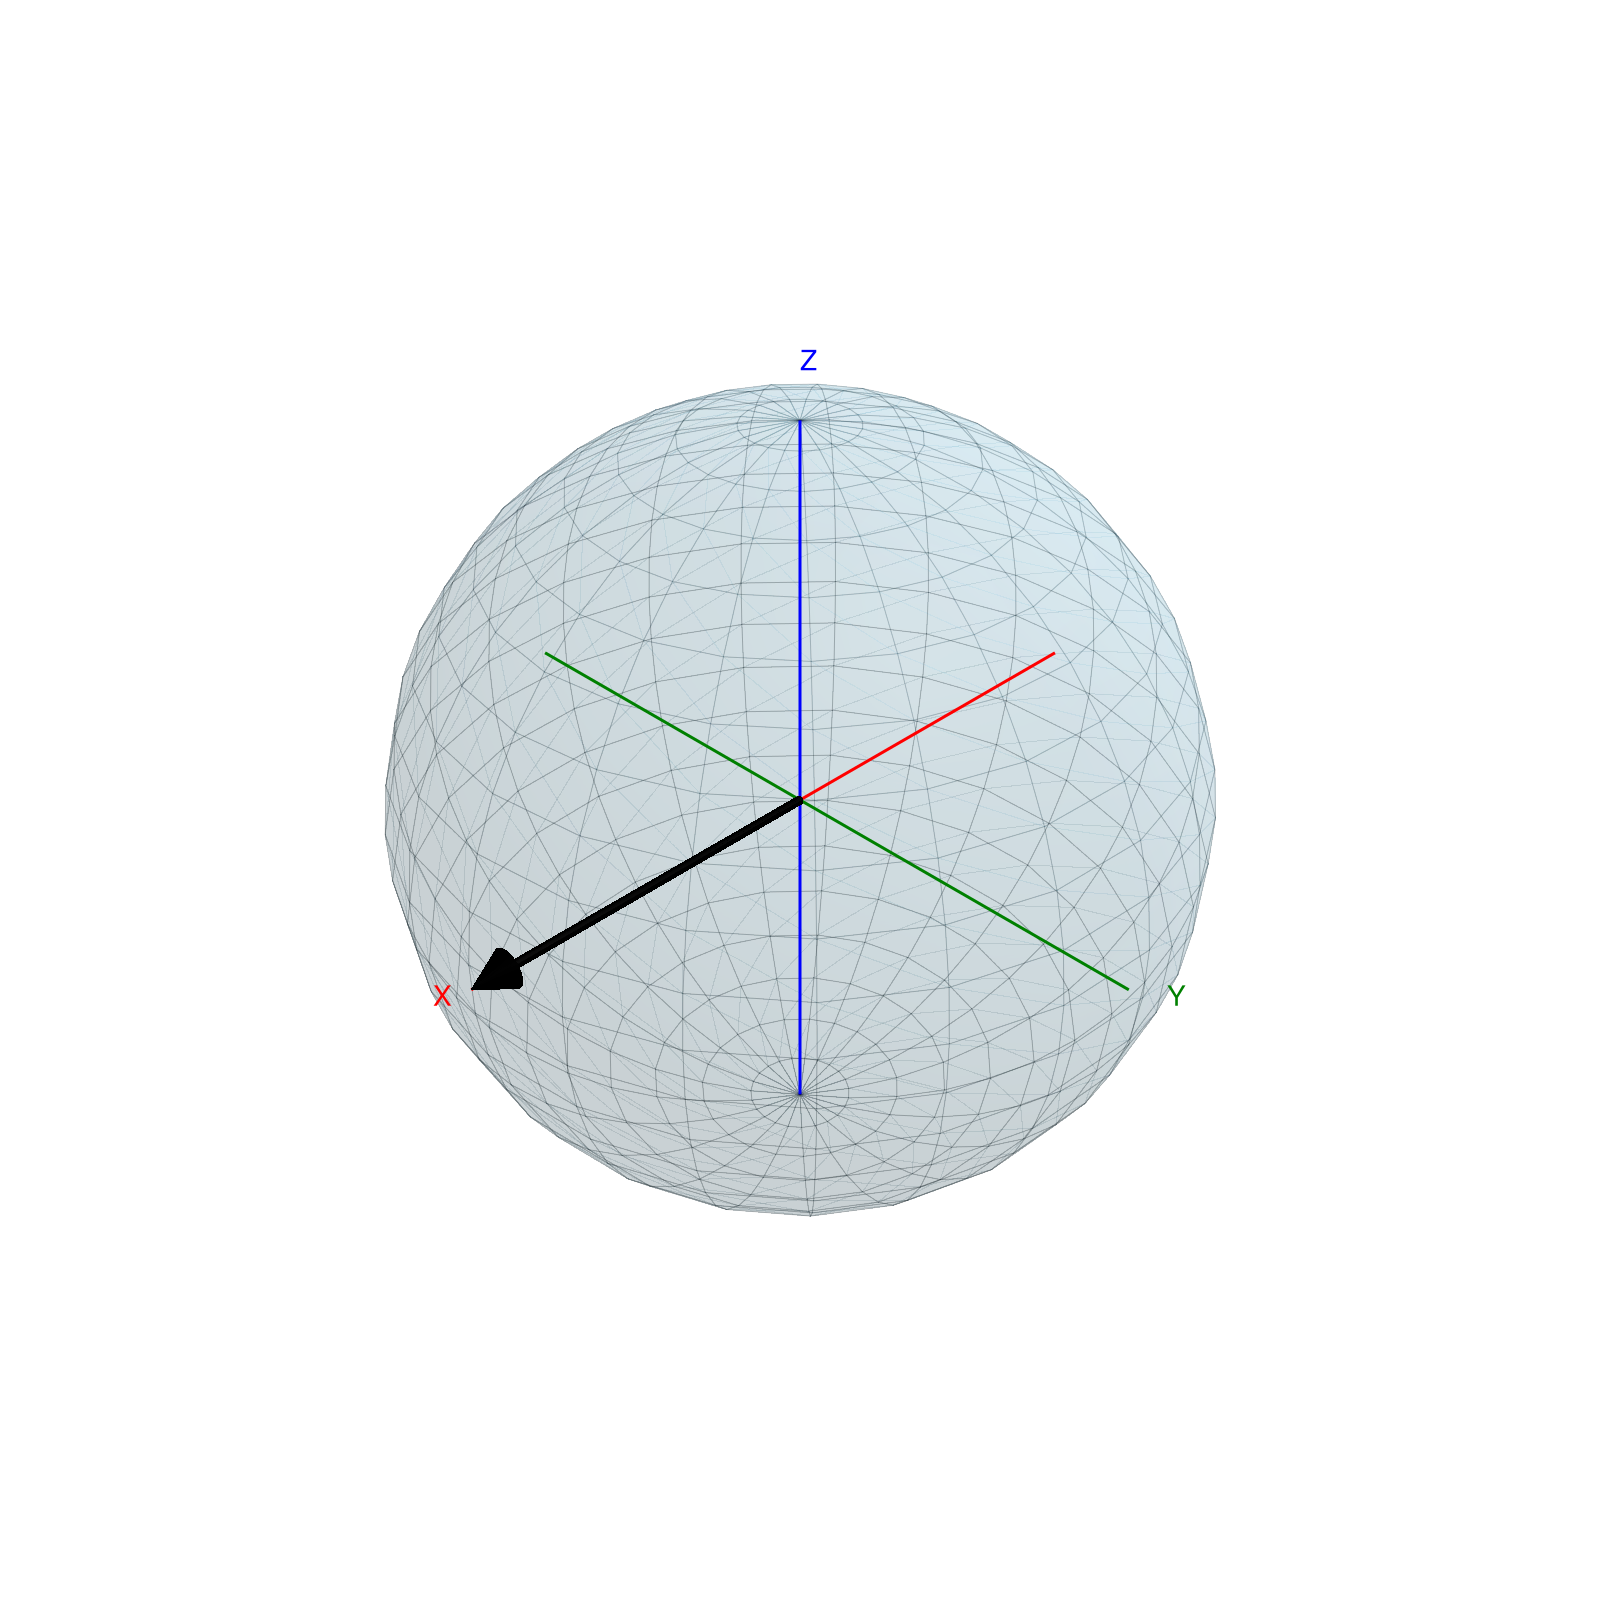

CairoMakie.Screen{IMAGE}


In [2]:
using BlochSpins
using StaticArrays

function bloch_vector(k::Ket)
    x = expect(σx, k)
    y = expect(σy, k)
    z = expect(σz, k)
    return SVector(x, y, z)
end

using CairoMakie
CairoMakie.activate!()

fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
visualize_vector!(fig, ax, bloch_vector(k_plus))
display(fig)


In [4]:
using LinearAlgebra

# direction of vectors
n1 = normalize(SVector(1, 1, 1))
n2 = normalize(SVector(1, 1, -1))

# hamiltonians
H(B::Float64, n::SVector) = -B * sum(n .* σ) 
ham = H(1.0, n1).data
@show eigen(ham)


eigen(ham) = Eigen{ComplexF64, Float64, SMatrix{2, 2, ComplexF64, 4}, SVector{2, Float64}}([-1.0, 1.0], ComplexF64[-0.8880738339771151 + 0.0im 0.45970084338098294 + 0.0im; -0.32505758367186816 - 0.32505758367186816im -0.6279630301995544 - 0.6279630301995544im])


Eigen{ComplexF64, Float64, SMatrix{2, 2, ComplexF64, 4}, SVector{2, Float64}}
values:
2-element SVector{2, Float64} with indices SOneTo(2):
 -1.0
  1.0
vectors:
2×2 SMatrix{2, 2, ComplexF64, 4} with indices SOneTo(2)×SOneTo(2):
 -0.888074+0.0im        0.459701+0.0im
 -0.325058-0.325058im  -0.627963-0.627963im

In [ ]:
psi_init = k_up
psi_target = k_down
# i dpsi dt = H psi

U(dt::Float64, H::Matrix{ComplexF64}) = exp(-1im * H * dt)

using BlochSpins
using StaticArrays

function bloch_vector(k::Ket)
    x = expect(σx, k)
    y = expect(σy, k)
    z = expect(σz, k)
    return SVector(x, y, z)
end

using CairoMakie
CairoMakie.activate!()

fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
visualize_vector!(fig, ax, bloch_vector(k_plus))
display(fig)


U (generic function with 1 method)

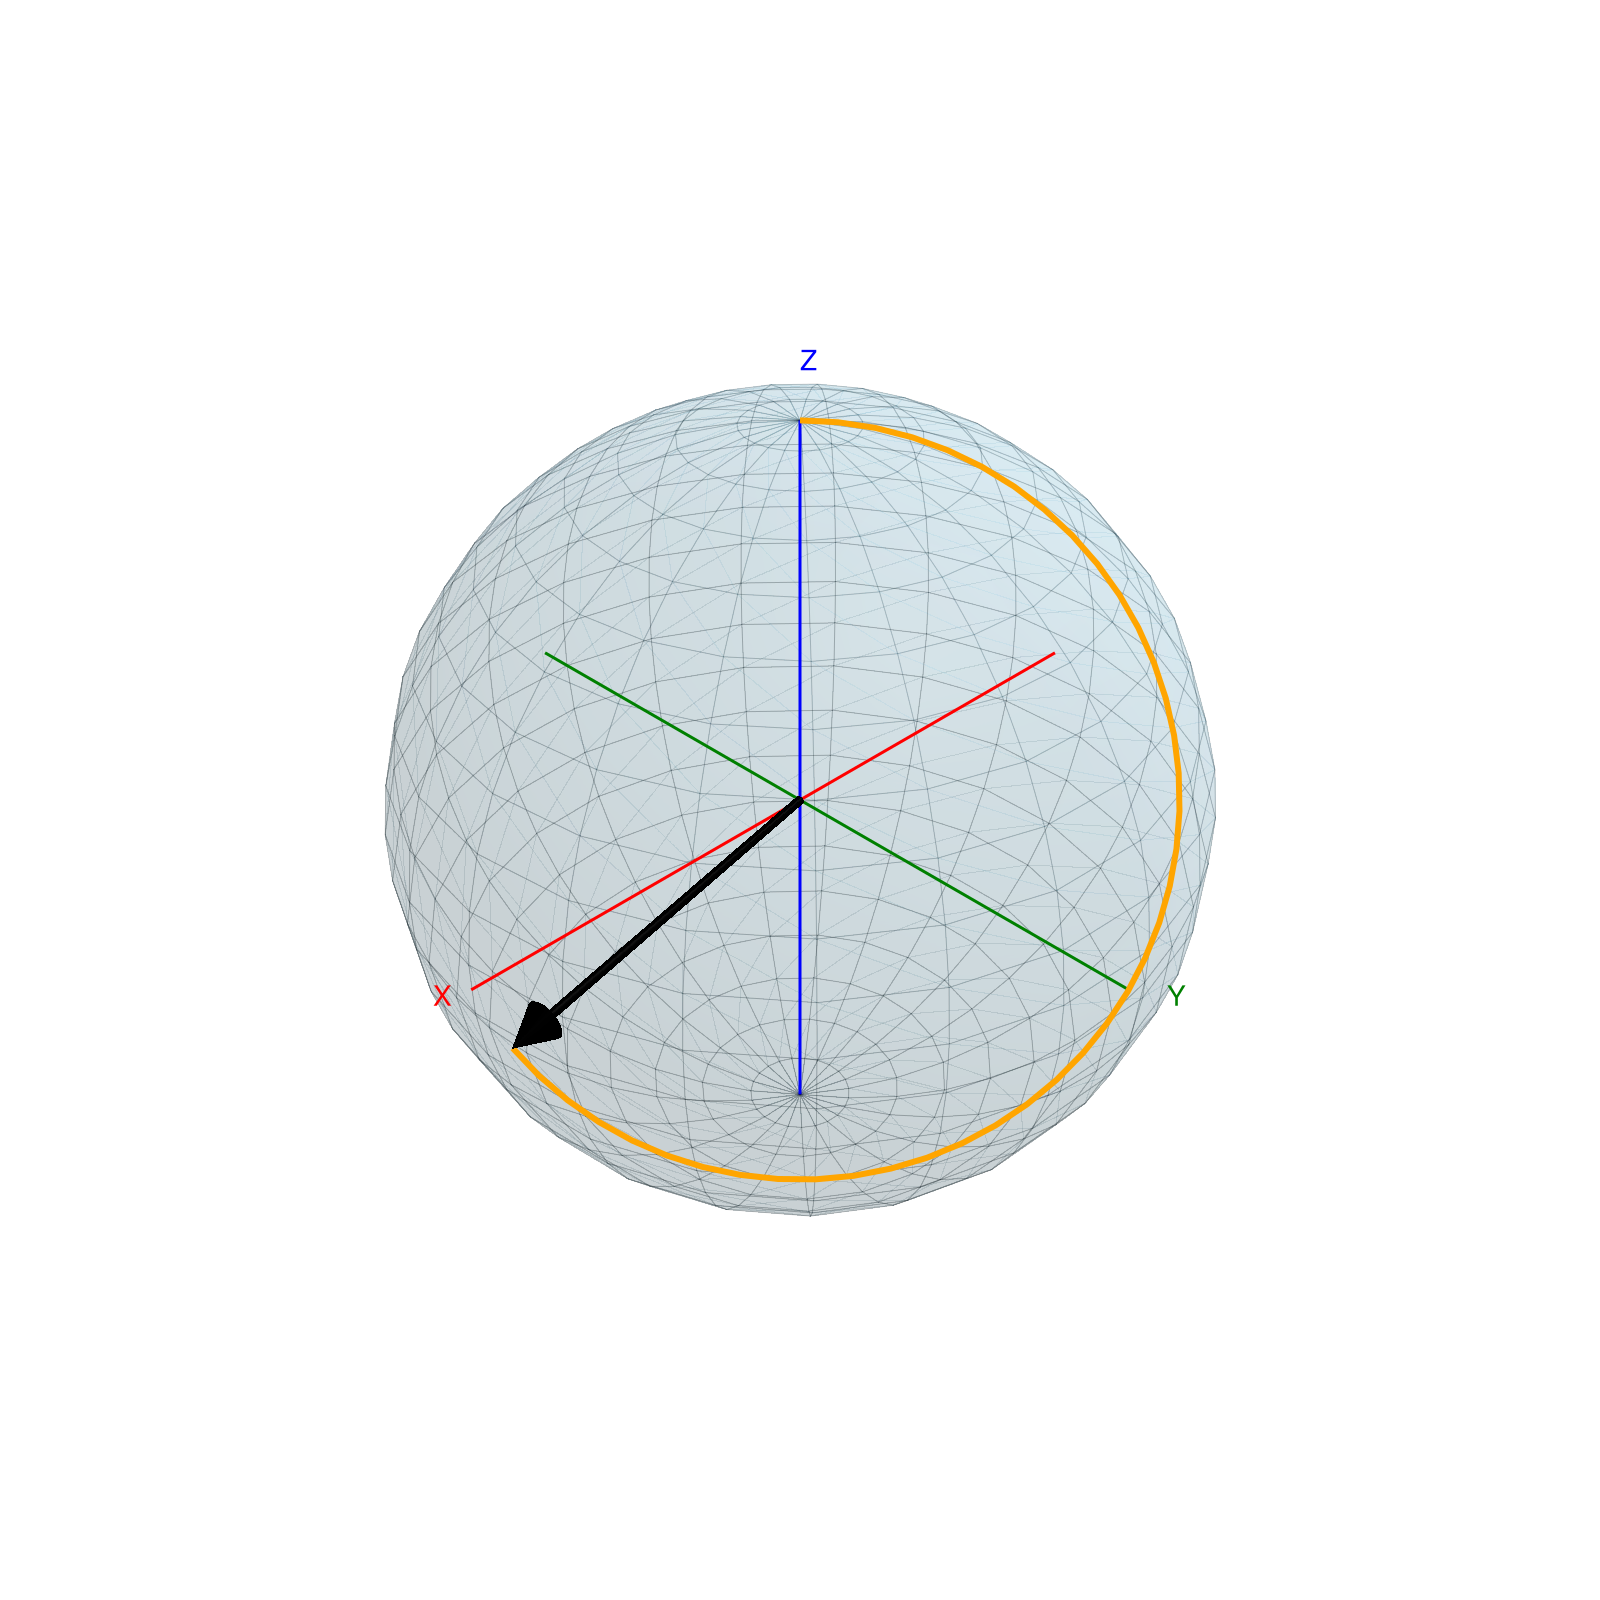

CairoMakie.Screen{IMAGE}


In [ ]:
using LinearAlgebra

# direction of vectors
n1 = normalize(SVector(1, 1, 1))
n2 = normalize(SVector(1, 1, -1))

# hamiltonians
H(B::Float64, n::SVector) = -B * sum(n .* σ) 

dt = 0.05
t_total = 2.0
times = 0:dt:t_total

# 2. 各時刻の状態を計算 (リスト内包表記)
H1 = H(1.0, normalize(SVector(1.0, 1.0, 1.0)))
states = [Ket(exp(-1im * H1.data * t) * k_up.v) for t in times]

# 3. 各状態を Bloch ベクトル (Point3f) の配列に変換
points = [Point3f(real.(bloch_vector(k))...) for k in states]

# 4. 可視化の実行
fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)

lines!(ax, points, color = :orange, linewidth = 3, label = "Trajectory")

# 現在の（最終地点の）ベクトルを矢印で描画
visualize_vector!(fig, ax, bloch_vector(states[end]))

display(fig)


In [5]:
n1 = normalize(SVector(1, 1, 1))
n2 = normalize(SVector(1, 1, -1))
H(B::Float64, n::SVector) = -B * sum(n .* σ) 

using CairoMakie
CairoMakie.activate!()
# 1. 準備：図と静的な要素の描画
fig, ax = init_figure()
visualize_bloch_sphere!(fig, ax)
visualize_axis!(fig, ax)
# 磁場の向き
arrows3d!(ax, [Point3f(0)], [Point3f(n1...)],
    tipradius=0.04, tiplength=0.08, shaftradius=0.007,
    color=:red, transparency=true)
text!(ax, "B", position=Point3f((n1 * 1.1)...), color=:red)


# 2. 動的なデータの定義 (Observable)
traj_obs = Observable([Point3f(real.(bloch_vector(k_up))...)])
vec_obs = Observable([Point3f(real.(bloch_vector(k_up))...)])

# 3. プロット（Observableを渡すことで、値が変わると自動で図が更新される）
lines!(ax, traj_obs, color = :orange, linewidth = 3)
arrows3d!(ax, [Point3f(0)], vec_obs, 
          tipradius = 0.05, tiplength = 0.1, shaftradius = 0.01, 
          color = :black)

# 4. 録画 (record)
# dt = 0.05, t_total = 2.0 π などの範囲で設定
times = 0:0.05:2π
H1 = H(1.0, normalize(SVector(1.0, 1.0, 1.0)))

record(fig, "bloch_trajectory.gif", times; framerate = 20) do t
    psi_t = Ket(exp(-1im * H1.data * t) * k_up.v)
    v = Point3f(real.(bloch_vector(psi_t))...)
    
    # Observable を更新
    push!(traj_obs[], v)
    notify(traj_obs)
    
    vec_obs[] = [v]
end



[56205] signal 15: Terminated
in expression starting at In[5]:33
unknown function (ip: 0x7ec4e836f9ee) at /lib/x86_64-linux-gnu/libc.so.6
unknown function (ip: 0x7ec4e8364667) at /lib/x86_64-linux-gnu/libc.so.6
unknown function (ip: 0x7ec4e83646ac) at /lib/x86_64-linux-gnu/libc.so.6
poll at /lib/x86_64-linux-gnu/libc.so.6 (unknown line)
_ZN3zmq15socket_poller_t4waitEP18zmq_poller_event_til at /root/.julia/artifacts/a95373603fb869dcd86b9f7191e57a4918ba6d2c/lib/libzmq.so (unknown line)
_ZN3zmq15proxy_steerableEPNS_13socket_base_tES1_S1_S1_ at /root/.julia/artifacts/a95373603fb869dcd86b9f7191e57a4918ba6d2c/lib/libzmq.so (unknown line)
zmq_proxy at /root/.julia/packages/ZMQ/yNY0H/src/bindings.jl:359 [inlined]
heartbeat_thread at /root/.julia/packages/IJulia/TXScA/src/heartbeat.jl:15
unknown function (ip: 0x7ec4cc10dc3f) at (unknown file)
unknown function (ip: 0x7ec4e8367b7a) at /lib/x86_64-linux-gnu/libc.so.6
__clone at /lib/x86_64-linux-gnu/libc.so.6 (unknown line)
unknown function (ip: 

: 